# Load the data and select the features to be used for modeling

In [1]:
import pandas as pd
import numpy as np

tennis_data = pd.read_csv("./tennis_dataset_final.csv")
X = tennis_data[['player1_rank', 'player2_rank','player1_1stserveper', "player2_1stserveper", "player1_acepercent", "player2_acepercent",\
                                          "player1_2ndserveper", "player2_2ndserveper", "player1_dbfaultper", "player2_dbfaultper",\
                                         "player1_h2h", "player2_h2h", "player1_ht", "player2_ht", "player1_age", "player2_age",\
                                        "carpet", "clay", "grass", "hard"]]

y = tennis_data['player1_win']

# split the data into training set and test set

In [2]:
import sklearn.model_selection as ms

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, 
                                                       test_size=1.0/10, random_state=0)





# 

# Select hyperparameters for Random Forest through CV

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier()

grid_para_forest = [{
    "n_estimators": [25, 50, 100],
    "criterion": ["gini", "entropy"],
    "min_samples_leaf": np.linspace(start=5, stop=100, num=15, dtype=int),
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int),
    "random_state": [42]}]
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, scoring='accuracy', cv=5, n_jobs=-1)
%time grid_search_forest.fit(X_train, y_train)

Wall time: 3h 12min 25s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
                                              warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'

In [11]:
grid_search_forest.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 5,
 'min_samples_split': 22,
 'n_estimators': 100,
 'random_state': 42}

In [12]:
grid_search_forest.best_score_

0.6582526899912026

# Feature importance plot of best estimator

(18,)

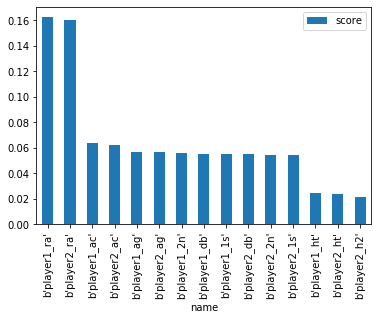

In [21]:
%matplotlib inline

feature_importance = list(zip(X_train.columns, grid_search_forest.best_estimator_.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
pd.DataFrame({'name':name,'score':score})[:15].plot.bar(x='name', y='score')

# Random Forest test with two features

In [9]:
#testing a Random Forest model without grid search
from sklearn.ensemble import RandomForestClassifier
#try with smaller dataset


rf = RandomForestClassifier()
rf.set_params(random_state=42, n_estimators=150, max_features=10, min_samples_leaf = 70, min_samples_split = 30)
rf.fit(X_train, y_train) # fit 
rf.score(X_train,y_train) # accuracy






0.6947282939703593

In [42]:
rf.score(X_test,y_test)

0.6516443361753959

In [13]:
rf.best_estimator_.feature_importances_

AttributeError: 'RandomForestClassifier' object has no attribute 'best_estimator_'

# Select hyperparameters for SVM through grid search

In [3]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV


grid_para_svm = [
    {'C': [1, 10, 100, 1000],
     'kernel': ['linear']}     
]

svmodel = svm.SVC()      
     
#grid_search_svm = GridSearchCV(svmodel, grid_para_svm, scoring='accuracy', cv=5, return_train_score=True, n_jobs=-1)
#%time grid_search_svm.fit(X_train, y_train)     

In [7]:
svmodel.set_params(C = 1)
svmodel.fit(X_train,y_train)
svmodel.score(X_test,y_test)



C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6025172553796183

In [8]:
svmodel.set_params(C = 10)
svmodel.fit(X_train,y_train)
svmodel.score(X_test,y_test)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.583028826634186

In [9]:
svmodel.set_params(C = 100)
svmodel.fit(X_train,y_train)
svmodel.score(X_test,y_test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5824198132358912

In [10]:
svmodel.set_params(C = 1000)
svmodel.fit(X_train,y_train)
svmodel.score(X_test,y_test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5824198132358912

In [21]:
grid_search_svm.best_estimator_.score(X_test, y_test)

0.5751116524563541

In [23]:
grid_search_svm.best_params_

{'C': 10, 'kernel': 'linear'}

# Fit an LDA model to the data

In [3]:
from sklearn import discriminant_analysis

LDA = discriminant_analysis.LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)

print(LDA.score(X_train, y_train))
print(LDA.score(X_test, y_test))

0.6395750152263653
0.6315468940316687


C:\Users\User\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


# Fit a Logistic Regression model to the data

In [4]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV


grid_para_logit = [
    {'C': [1, 10, 100, 1000, 10000]}   
]



logit = linear_model.LogisticRegression()


grid_search_logit = GridSearchCV(logit, grid_para_logit, scoring='accuracy', cv=5, return_train_score=True, n_jobs=-1)
grid_search_logit.fit(X_train,y_train)




C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000, 10000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [6]:
grid_search_logit.best_params_

{'C': 1}

In [5]:
grid_search_logit.best_estimator_.score(X_test,y_test)

0.6386520503451076

# Selecting hyperparameters for SVM through g